In [44]:
import sys
sys.path.insert(0, '../python')
from bifDiag import bifDiag
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

from numpy import meshgrid, array, identity, ones, diag, zeros, block, real, imag
from math import sqrt
from numpy.linalg import norm, eig

In [45]:
# load AUTO data
bname, sname = "b.1", "s.1"
bd = bifDiag(bname,sname)

In [46]:
# these are the types and labels for algebraic problems
# "user output point" is type number -4, so this works for that
AUTOtypes = ["","BP","LP","HB","","","UZ","","","EP"]
AUTOlabels = ["","branch point","fold","Hopf bifurcation","regular output point","","user output point","",
                  "", "end point"]
NDim = bd[0].c['NDIM']
# branches of the solution
branches = [ 
         { "par"       : br.coordarray[0,:], 
           "L2norm"    : br.coordarray[1,:],
           "branchnum" : br.BR
         } for br in bd ]
# individual solutions
sols = [ {  "u"         : array( s[0]['u'] ),
            "L2norm"    : norm( s[0]['u'] ),
            "par"       : s.PAR[0],
            "branchnum" : s.data['BR'],
            "typenum"   : s.data['TY number'],
            "type"      : AUTOtypes[ s.data['TY number'] ],
            "typename"  : AUTOlabels[ s.data['TY number'] ]
         } for s in bd() ]

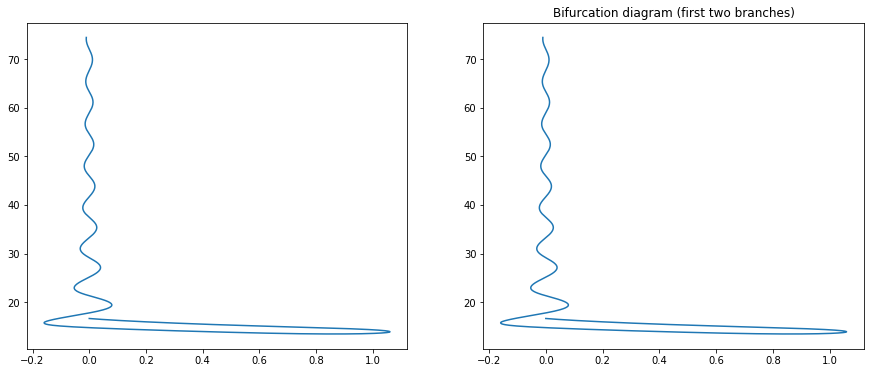

In [47]:
# plot bifurcation diagram
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# whole thing
for branch in branches:
    bcolor = 'C'+str( branch["branchnum"] - 1 )
    axs[0].plot( branch['par'], branch['L2norm'], c=bcolor)
    
# initial branches only
num_branches = 1;
for branch in branches[0:num_branches]:
    bcolor = 'C'+str( branch["branchnum"] - 1 )
    axs[1].plot( branch['par'], branch['L2norm'], c=bcolor)
    axs[1].set_title('Bifurcation diagram (first two branches)')

In [48]:
# plot solution along with place on bifurcation diagram
def plotsol(index):
    fig, axs = plt.subplots(1, 2, figsize=(11, 5))
    
    # how many branches to plot
    num_branches = 3;
    
    # current piece of bifurcation diagram
    par_d = sols[index]['par']
    branchnum = sols[index]['branchnum']
    bcolor = 'C'+str( branchnum - 1 )
    axs[0].set_xlabel('coupling parameter (d)')
    axs[0].set_ylabel('L2 norm')
#     axs[0].set_title('Bifuration diagram'+" (branch "+str(branchnum)+")")
    axs[0].set_title('Bifuration diagram: d = ' +str(par_d))

    # plot current branch
    current_branch = [ branches[i] for i in range(len(branches)) if branches[i]['branchnum'] == branchnum ]
    axs[0].plot( current_branch[0]['par'], current_branch[0]['L2norm'], c=bcolor )
    axs[0].scatter( sols[index]['par'], sols[index]['L2norm'], s=60, c='black' )
    # put main branch on there too
    if branchnum > 0:
        axs[0].plot( branches[0]['par'], branches[0]['L2norm'], c='C0' )
    
    # solution
    sol = sols[index]['u']
#     center = int(len(sol)/2);
#     offset = 15;
#     sol = sol[center-offset:center+offset+1]
#     axs[1].plot( range(-offset,offset+1), sol, c=bcolor )
#     axs[1].scatter( range(-offset,offset+1), sol, c=bcolor )
#     axs[1].set_title('Solution'+' ('+sols[index]['typename'] +')')

    # solution
    center = int(len(sol)/2);
    axs[1].plot( range(-center,center), sol, c=bcolor )
    axs[1].scatter( range(-center,center), sol, c=bcolor )
    axs[1].set_title('Solution'+' ('+sols[index]['typename'] +')')

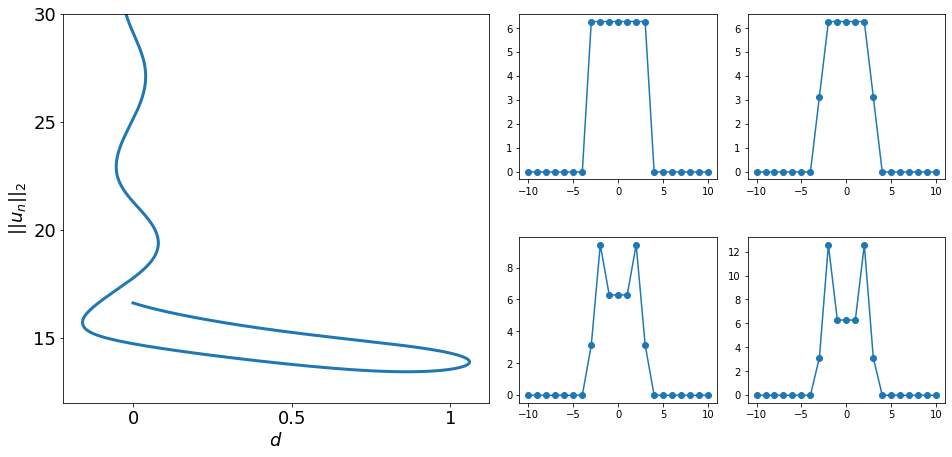

In [61]:
# main snaking plot

fig=plt.figure(figsize=(26,12))
gs = GridSpec(4,8, figure=fig)
fontsize = 18

axMain = fig.add_subplot(gs[0:2,0:2])
ax1 = fig.add_subplot(gs[0,2])
ax2 = fig.add_subplot(gs[0,3])
ax3 = fig.add_subplot(gs[1,2])
ax4 = fig.add_subplot(gs[1,3])

# whole thing
for branch in branches[0:1]:
    bcolor = 'C'+str( branch["branchnum"] - 1 )
    axMain.plot( branch['par'], branch['L2norm'], c=bcolor, linewidth=3)
    axMain.set_ylim((12,30))
    axMain.set_xlabel('$d$',fontsize=fontsize);
    axMain.set_ylabel('$||u_n||_2$',fontsize=fontsize);
    axMain.set_xticks([0, 0.5, 1])
    axMain.set_xticklabels([0, 0.5, 1],fontsize=fontsize);
    axMain.set_yticks([15,20,25,30]);
    axMain.set_yticklabels([15,20,25,30],fontsize=fontsize);

indices = [ i for i, s in enumerate(sols) if s['type'] != '' and s['branchnum'] == 1 ]
center = int(len(sols[indices[0]]['u'])/2);
offset = 10;
x = range(-offset,offset+1)

ax1.plot( x, sols[indices[0]]['u'][center-offset-1:center+offset], '-o')
ax2.plot( x, sols[indices[2]]['u'][center-offset-1:center+offset], '-o')
ax3.plot( x, sols[indices[4]]['u'][center-offset-1:center+offset], '-o')
ax4.plot( x, sols[indices[6]]['u'][center-offset-1:center+offset], '-o')
ax5.plot( x, sols[indices[8]]['u'][center-offset-1:center+offset], '-o')
ax6.plot( x, sols[indices[10]]['u'][center-offset-1:center+offset], '-o')

plt.tight_layout()

plt.savefig('images/SGsnakingmain.eps', format='eps', bbox_inches='tight')

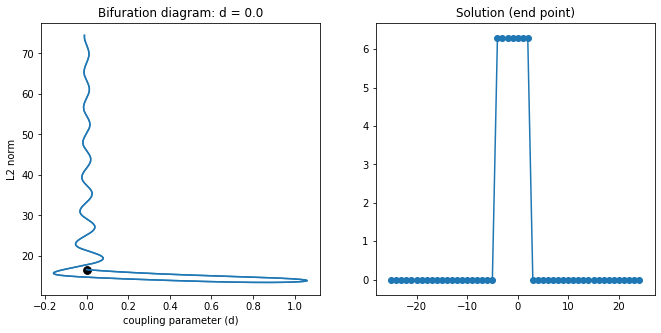

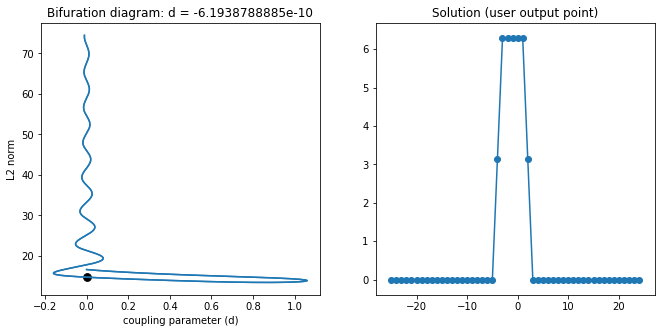

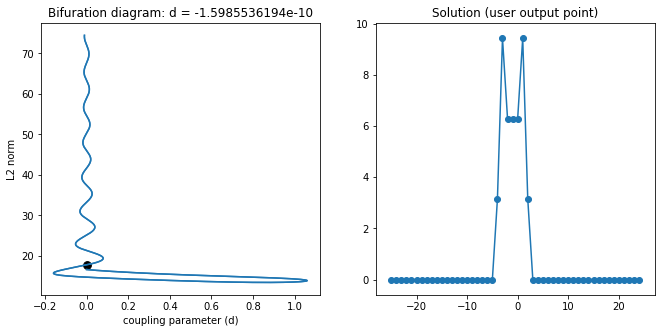

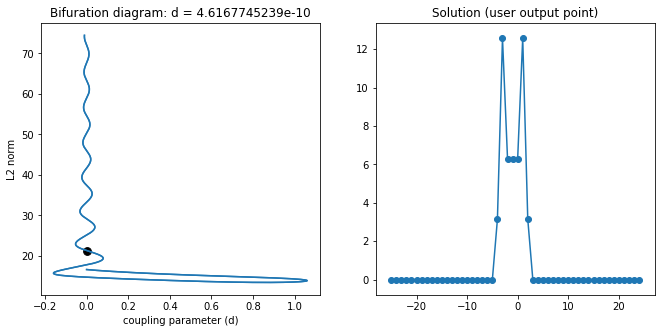

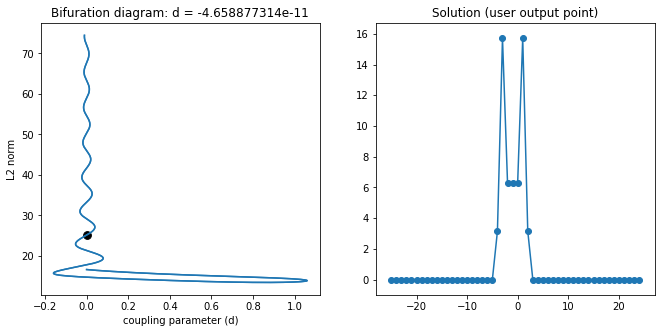

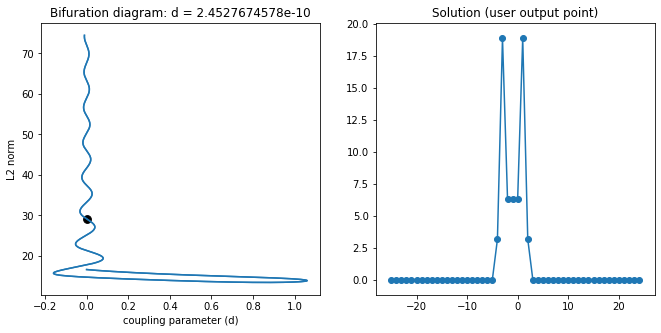

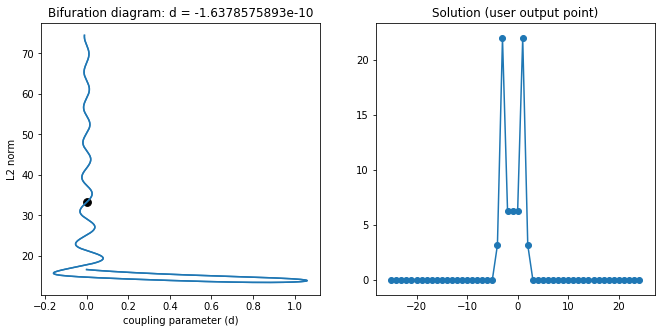

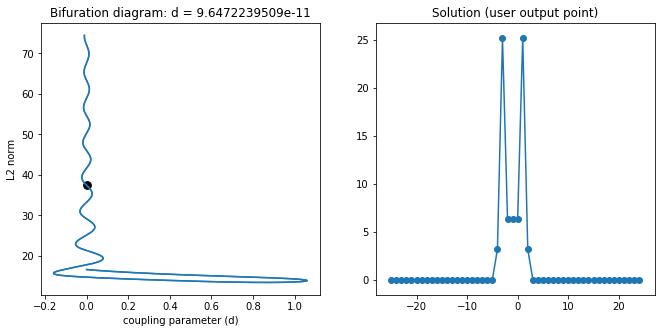

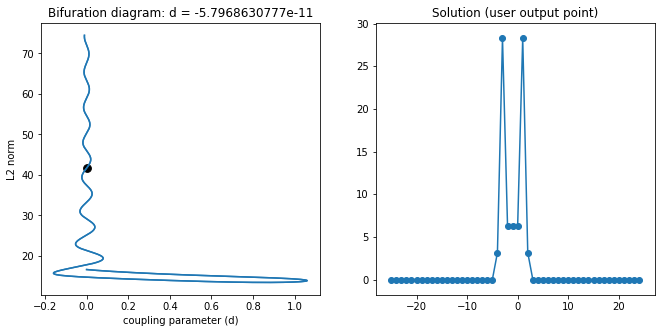

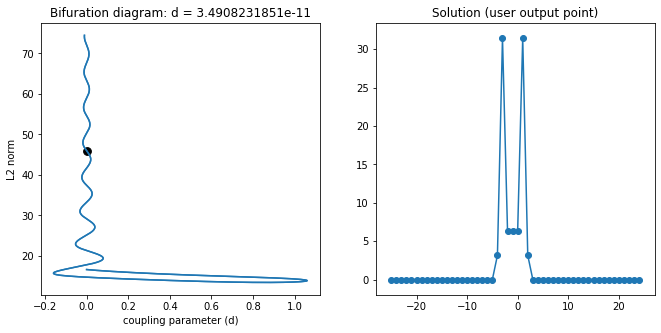

In [49]:
# Solutions for main branch

plotnum = 1;
indices = [ i for i, s in enumerate(sols) if s['type'] != '' and s['branchnum'] <= 1 ]
# plot initial condition
plotsol(0)
plotnum = 2
for index in indices[0:20]:
    ty = sols[index]['type']
    # if ty == 'UZ' or ty == 'EP' or ty == 'BP':
    if ty == 'UZ' or ty == 'BP':
        plotsol(index)
